In [2]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [13]:
def draw_boxplot(result_list, title):
    filename = title + '.png'
    
    plt.rcParams['figure.figsize'] = [20, 15]
    xlabel = ['is_1', 'is_2', 'is_3', 'es_1', 'es_2', 'es_3']

    plt.boxplot(result_list)
    plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('score(vote)', fontsize=16)
    plt.yscale('log')
    
    plt.savefig(filename, dpi=300)
    
    plt.show()

In [18]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors1 = []
sqls1 = []
results1 = []
result_list1 = []
for i in range(6):
    cursors1.append(connection.cursor(pymysql.cursors.DictCursor))

sqls1.append('select score from comments where is_score = 1;')
sqls1.append('select score from comments where is_score = 2;')
sqls1.append('select score from comments where is_score = 3;')
sqls1.append('select score from comments where es_score = 1;')
sqls1.append('select score from comments where es_score = 2;')
sqls1.append('select score from comments where es_score = 3;')

for i in range(6):
    cursors1[i].execute(sqls1[i])
    # result가 dict 형태로 return.
    results1.append(cursors1[i].fetchall())

connection.close()

for i in range(6):
    results1[i] = pd.DataFrame(results1[i])
    result_list1.append(list(np.array(results1[i]['score'].tolist())))

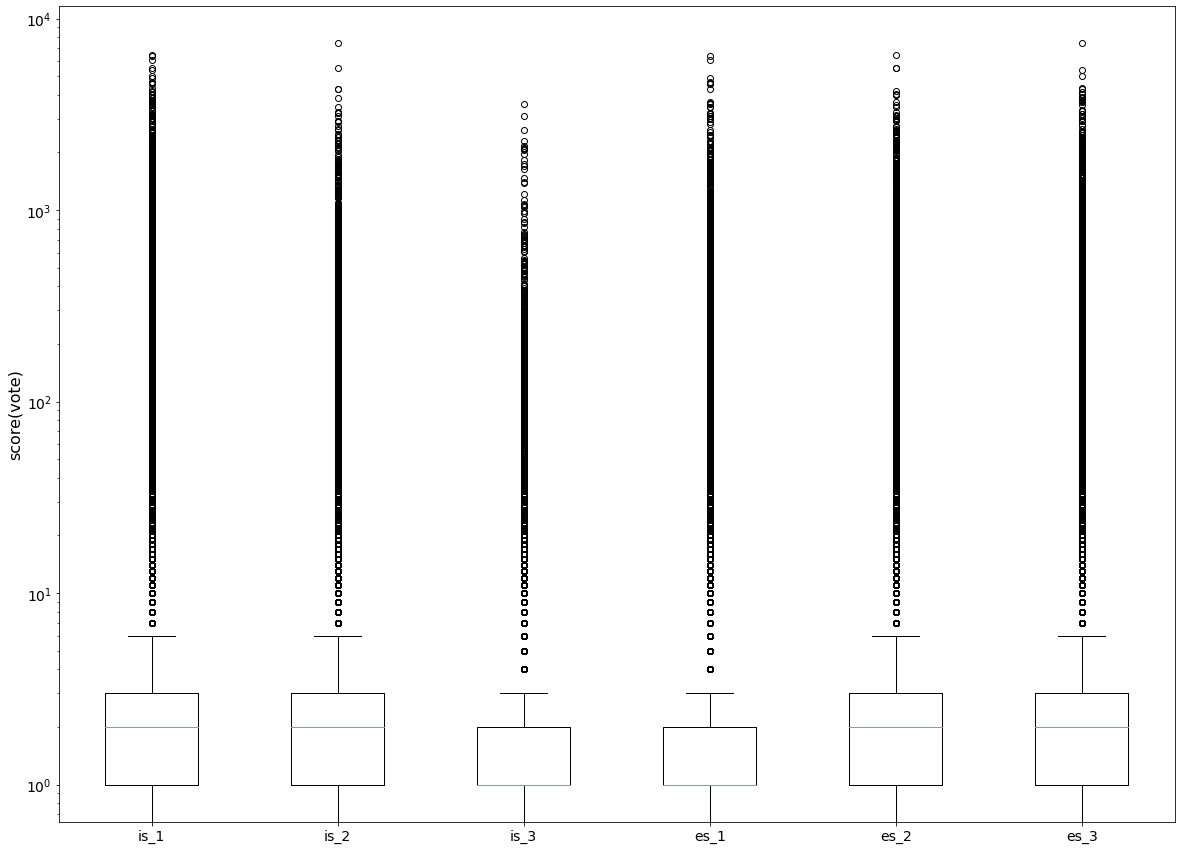

In [19]:
draw_boxplot(result_list1, "Boxplot Support Score - Vote")

In [20]:
connection = cn.make_connection('connection.csv')

cursors2 = []
sqls2 = []
results2 = []
result_list2 = []
for i in range(6):
    cursors2.append(connection.cursor(pymysql.cursors.DictCursor))
    
where = "author not in ('greatyellowshark', 'gurneyhallack', 'aristapop', 'Pi25', 'SeriousSamStone', 'Umbresp', 'CUTIEJUDY', 'Imissmemom', 'aagee', 'noonches', 'Vientodecara', 'Jolojil', 'sciential84', 'AmazonPriceBot', 'AmputatorBot', 'AntiObnoxiousBot', 'ClickableLinkBot', 'converter-bot', 'CoolDownBot', 'FakespotAnalysisBot', 'HappyCakeBot', 'hotlinehelpbot', 'lerobinbot', 'LimbRetrieval-Bot', 'LinkifyBot', 'NoGoogleAMPBot', 'oofed-bot', 'PORTMANTEAU-BOT', 'Reddit-Book-Bot', 'remindditbot', 'RemindMeBot', 'RepostSleuthBot', 'RossGellerBot', 'sneakpeekbot', 'the_timezone_bot', 'timee_bot', 'tiny_smile_bot', 'TitleLinkHelperBot', 'wikipedia_answer_bot', ' wikipedia_text_bot', 'WikiTextBot', 'YoMommaJokeBot', '', 'AutoModerator');"

sqls2.append("select score from comments where is_score = 1 and " + where)
sqls2.append("select score from comments where is_score = 2 and " + where)
sqls2.append("select score from comments where is_score = 3 and " + where)
sqls2.append("select score from comments where es_score = 1 and " + where)
sqls2.append("select score from comments where es_score = 2 and " + where)
sqls2.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors2[i].execute(sqls2[i])
    # result가 dict 형태로 return.
    results2.append(cursors2[i].fetchall())

connection.close()

for i in range(6):
    results2[i] = pd.DataFrame(results2[i])
    result_list2.append(list(np.array(results2[i]['score'].tolist())))

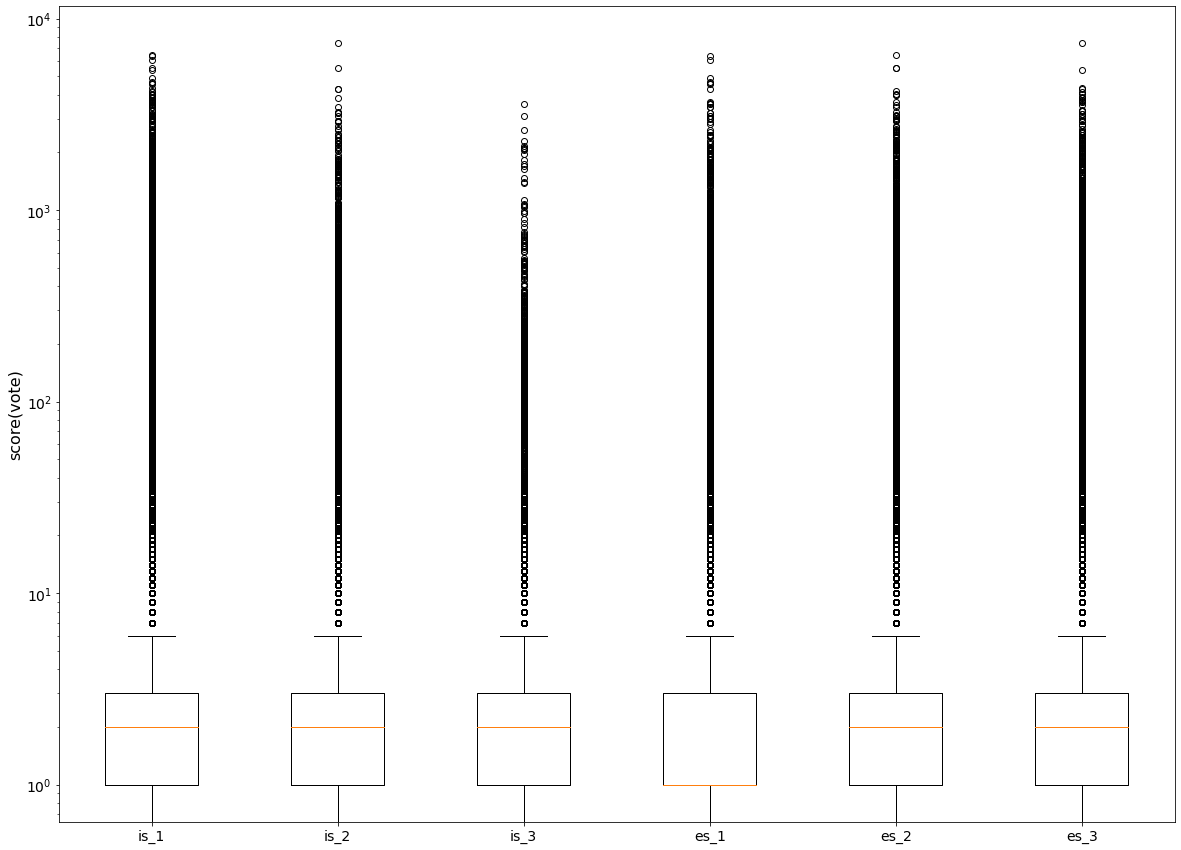

In [21]:
draw_boxplot(result_list2, "Boxplot Support Score - Vote (without all blank, moderators, bots)")